# Sentiment Analysis of Twitter Posts
<!-- Notebook name goes here -->
<center><b>Notebook: Multinomial Logistic Regression, Error Analysis, and Tuning</b></center>
<br>

**By**: Stephen Borja, Justin Ching, Erin Chua, and Zhean Ganituen.

**Dataset**: Hussein, S. (2021). Twitter Sentiments Dataset [Dataset]. Mendeley. https://doi.org/10.17632/Z9ZW7NT5H2.1

**Motivation**: Every minute, social media users generate a large influx of textual data on live events. Performing sentiment analysis on this data provides a real-time view of public perception, enabling quick insights into the general population’s opinions and reactions.

**Goal**: By the end of the project, our goal is to create and compare supervised learning algorithms for sentiment analysis.

# **1. Setting-up**



### Imports
Here we set up the needed imports for the logistic regression model

In [94]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)

sys.path.append(os.path.abspath("../lib"))
from bag_of_words import BagOfWordsModel


### Reading the data

After the cleaning process

In [95]:
df = pd.read_csv("../data/data_post_lemma.csv")
df.head()

,clean_text,category,clean_ours,lemmatized
0,when modi promised “minimum government maximum...,-1,when modi promised minimum government maximum ...,when modi promise minimum government maximum g...
1,talk all the nonsense and continue all the dra...,0,talk all the nonsense and continue all the dra...,talk all the nonsense and continue all the dra...
2,what did just say vote for modi welcome bjp t...,1,what did just say vote for modi welcome bjp to...,what do just say vote for modi welcome bjp tel...
3,asking his supporters prefix chowkidar their n...,1,asking his supporters prefix chowkidar their n...,ask his supporter prefix chowkidar their name ...
4,answer who among these the most powerful world...,1,answer who among these the most powerful world...,answer who among these the most powerful world...


# **3. Columns**

In [96]:
df = df[["lemmatized", 'category']]
df.head()

,lemmatized,category
0,when modi promise minimum government maximum g...,-1
1,talk all the nonsense and continue all the dra...,0
2,what do just say vote for modi welcome bjp tel...,1
3,ask his supporter prefix chowkidar their name ...,1
4,answer who among these the most powerful world...,1


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162942 entries, 0 to 162941
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   lemmatized  162942 non-null  object
 1   category    162942 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.5+ MB


# **4. Training and test data**

Here we assign the 

In [98]:
X_train, X_test, y_train, y_test = train_test_split(df["lemmatized"], df["category"], test_size=0.2, train_size=0.8)

To check if the data separated according to the test and training size, we can check the length of `X_train` and `X_test`

In [99]:
len(X_train)

130353

In [100]:
len(X_test)

32589

# **5. Bag of Words**

In [101]:
BoW = BagOfWordsModel(X_train, min_freq=5)
X_train_vec = BoW.matrix
X_test_vec = BoW.vectorizer.transform(X_test)

c:\Users\Erin\Documents\GITHUB\STINTSY-Order-of-Erin\.venv\Lib\site-packages\sklearn\feature_extraction\text.py:526: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


# **6. Training the model**

In [102]:
model = LogisticRegression(max_iter=1000)

In [103]:
model.fit(X_train_vec, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

# **7. Evaluate Performance**

ill edit this

In [104]:
model.score(X_test_vec, y_test)

0.8942587989812514

# **8. Error Analysis**

In [105]:
y_true = y_test
y_pred = model.predict(X_test_vec)

In [106]:
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

In [107]:
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")

Accuracy:  0.8943
Precision: 0.8940
Recall:    0.8943
F1 Score:  0.8938


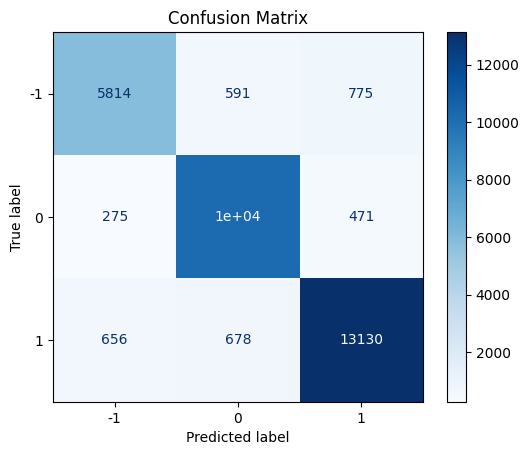

In [110]:
cm = ConfusionMatrixDisplay.from_predictions(
    y_test, 
    y_pred, 
    cmap='Blues',
    display_labels=[-1, 0, 1]
)
plt.title('Confusion Matrix')
plt.show()

# **9. Model Tuning**

# Further Evaluation